# Neutron scattering and Monte Carlo methods

Please indicate your name below, since you will need to submit this notebook completed latest the day after the datalab.

Don't forget to save your progress during the datalab to avoid any loss due to crashes.

In [1]:
name='MIIIIIKKKEL'

In this datalab we are going to get acquainted with the basics of Monte Carlo particle transport methods, and we will learn how to sample random events and random values from various distributions. These are going to be our bricks which later we will put together into an actual Monte Carlo simulation.

Since neutron reactions, espescially scattering, provide an excellent ground to familiarize ourselves with Monte Carlo particle transport methods, we will also use this lab to review some of the features of elastic neutron scattering.

**Prerequisites**: Before the lab you should have reviewed the lecture on neutron scattering and the short introduction on Monte Carlo methods and pseudorandom numbers.

The new python knowledge from the lab is going to be 
- histograms with `plt.hist`
- random number generators from `numpy.random`

Let's get started and have some fun!

## Experiment 1: Relation of angle and energy in elastic scattering

We have discussed the elastic potential scattering in the CM frame, and showed that for the LAB energy 

$$E_l'=\frac{1}{2}E_l[(1+\alpha)+(1-\alpha)\cos\theta_C]$$

where

$$\alpha=\big(\frac{A-1}{A+1}\big)^2$$

and $A=M/m$

Let's investigate how the ratio of the incoming and the outgoing neutron energy depends on the scattering angle.

Plot the above formula for several nuclides (eg. A=1, A=12, A=23, etc) and for angles between $0^\circ-360^\circ$. Do not repeat the plotting command, use a loop instead to iterate through all mass numbers. After the plot write a sentence on your conclusion!

**Note #1**: Remember, `np.cos` can perform the operation on a numpy array or list.

**Note #2**: Trigonometric functions in numpy take values in radians.

**Note #3**: $\pi$ can be accessed as `np.pi`.

**Note #4**: If you wish to use specific colors for the curves, you can define your own list of colors, and call a color according to the indices in the plot (eg. `colors=['blue','green',...]`

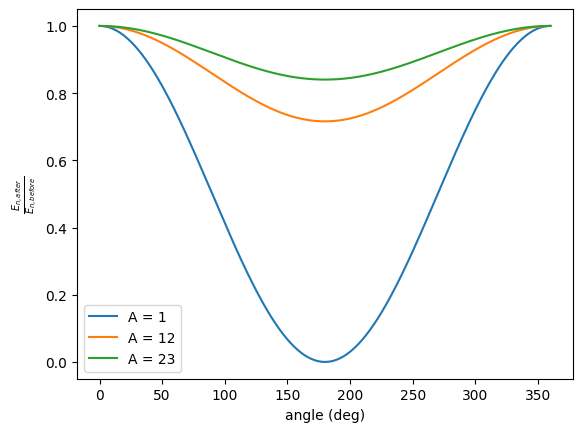

In [2]:
import numpy as np
import matplotlib.pyplot as plt
theta=np.linspace(0,360,361)*np.pi/180 #Remove the first comment!
As=[1,12,23] #Feel free to add more
plt.figure()
# Your loop and plotting comes here
def E_l(A, theta, E_i=1): # This is not well made :(
    a = ((A-1)/(A+1))**2
    return ((1+a) +(1-a)*np.cos(theta))/2


for A in As:
    xs = theta
    ys = E_l(A, xs)

    plt.plot(xs*180/np.pi, ys, label=f"A = {A}")

plt.legend()
plt.xlabel('angle (deg)')
plt.ylabel(r"$\frac{E_{n,after}}{E_{n,before}}$")
plt.show()

## Experiment 2: Isotropic directions

When sampling *isotropic* directions, one is often tempted to think that the colatitude or polar angle $\theta$ is uniformly distributed over $[0,\pi]$ and the azimuth $\phi$ is uniformly distrubted over $[0,2\pi]$. However this is not the case. It is $\cos\theta$ which is uniformly distributed over $[-1,1]$. Further reading: http://corysimon.github.io/articles/uniformdistn-on-sphere/ (note the angles are named opposite).  Remember the conversion between Cartesian coordinates and polar coordinates:

$$x=r\sin\theta\cos\phi$$
$$y=r\sin\theta\sin\phi$$
$$z=r\cos\theta$$

Read and run the two code cells below. The code creates 1000 unit length ($r=1$) vectors' coordinates, and visualizes them. The two code blocks contain the same code besides the way how `theta` is being created. The first code block samples `theta` uniformly between $[0,\pi]$ (incorrect), and the second samples the cosine of `theta` uniformly between $[-1,1]$. Observe that in the first **incorrect** case the poles are oversampled.

**Note #1**. We are using `np.random.uniform` to generate uniformly generated random numbers. The first input of this function is the lower boundary of the distribution, the second is the higher boundary, and the third is the number of random numbers to be sampled. Note that `np. random` has several built-in functions to sample random numbers from various distributions, you can review them with `?np.random`.

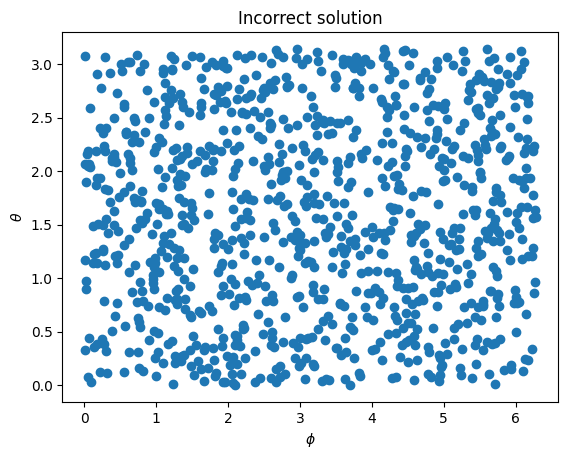

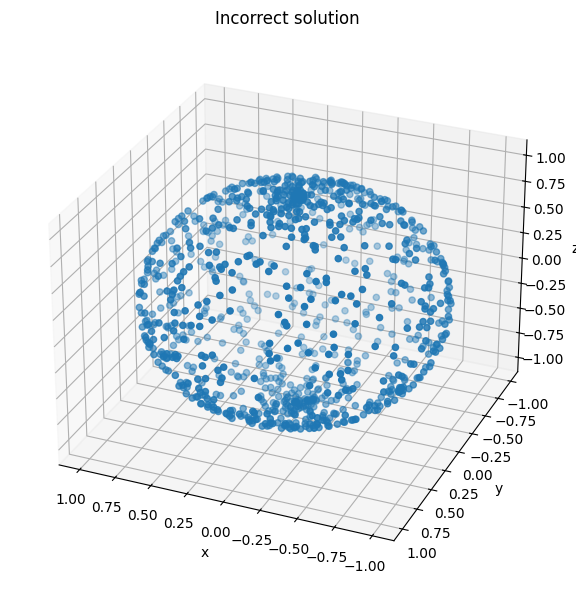

In [3]:
from mpl_toolkits.mplot3d import Axes3D

N=1000
r=np.ones(N)
theta=np.random.uniform(0,np.pi,N) ### INCORRECT
mu=np.cos(theta)
phi=np.random.uniform(0,2*np.pi,N)

x=r*np.sin(theta)*np.cos(phi)
y=r*np.sin(theta)*np.sin(phi)
z=r*np.cos(theta)

plt.figure()
plt.scatter(phi,theta)
plt.xlabel(r'$\phi$')
plt.ylabel(r'$\theta$')
plt.title('Incorrect solution')
plt.show()

fig = plt.figure(figsize=plt.figaspect(1.0)*1.5) 
#Adjusts the aspect ratio and enlarges the figure (text does not enlarge)
ax = fig.subplots(subplot_kw={"projection": "3d"})
ax.scatter(x,y,z)
plt.title('Incorrect solution')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.azim = 113
ax.elev = 28
plt.show()

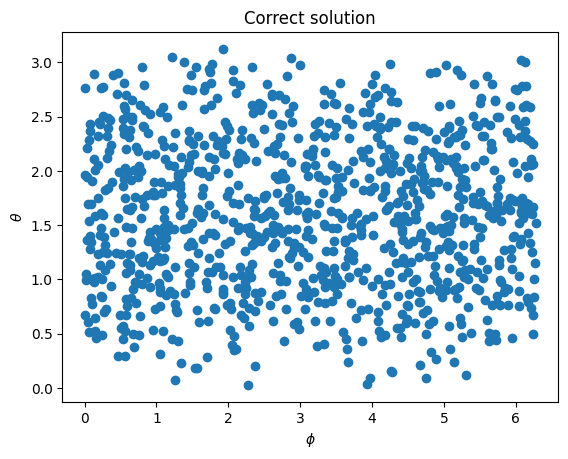

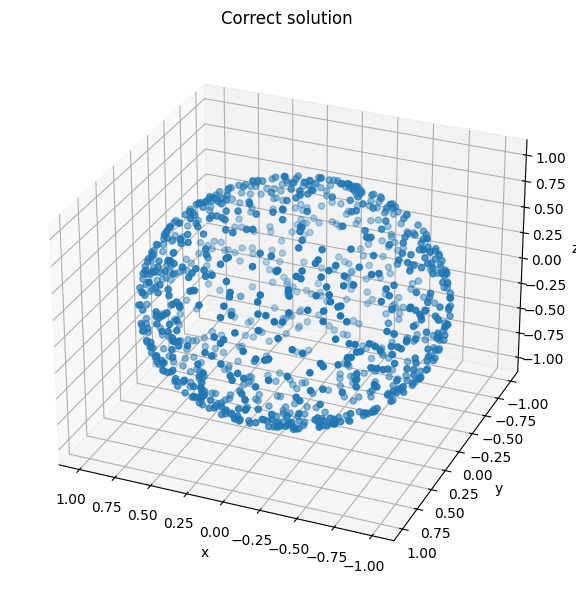

In [4]:
N=1000
r=np.ones(N)
mu=np.random.uniform(-1,1,N)        ### CORRECT
theta=np.arccos(mu)
phi=np.random.uniform(0,2*np.pi,N)

x=r*np.sin(theta)*np.cos(phi)
y=r*np.sin(theta)*np.sin(phi)
z=r*np.cos(theta)

plt.figure()
plt.scatter(phi,theta)
plt.xlabel(r'$\phi$')
plt.ylabel(r'$\theta$')
plt.title('Correct solution')
plt.show()

fig = plt.figure(figsize=plt.figaspect(1.0)*1.5)
#Adjusts the aspect ratio and enlarges the figure (text does not enlarge)
ax = fig.subplots(subplot_kw={"projection": "3d"})
ax.scatter(x,y,z)
plt.title('Correct solution')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.azim = 113
ax.elev = 28
plt.show()

## Experiment 3: Distribution of outgoing energy

We just showed that isotropic scattering means that the CM cosine of the angle is uniformly distributed. So let us combine exercise 1 and 2, and investigate the distribution of the outgoing neutron energy for isotropic scattering. 

Generate 1 million uniformly distributed angle cosines in CM (`muC`), and  calculate the final energy distribution of 1 MeV neutrons after scattering isotropically. Then use `plt.hist` to visualize the distribution of the energy. What is your  expectation? Conclude what you have found. 

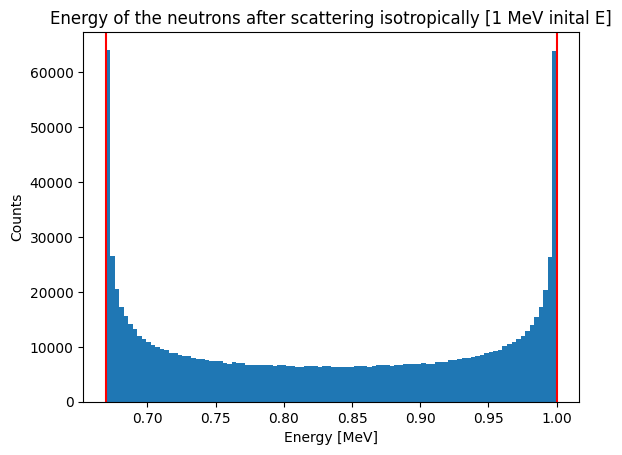

In [5]:
A=10 #You can change this to study other target nuclides
Ei=1 #MeV
Nsample=1e6 #Number of angles to sample

alpha = ((A-1)/(A+1))**2 # Finish the line

N=int(Nsample)
r=np.ones(N)
mu = np.random.uniform(-np.pi, np.pi,N)

Ef = E_l(A,mu) #Final energy from muC, Ei, alpha. Note: muC is already the cosine!

#Here we create a histogram with 100 bins
Nbin=100
plt.figure()
plt.hist(Ef,Nbin)
plt.axvline(Ei,color='r') #adds vertical line at Ei
plt.axvline(alpha*Ei,color='r')
plt.xlabel("Energy [MeV]")
plt.title("Energy of the neutrons after scattering isotropically [1 MeV inital E]")
plt.ylabel("Counts")
plt.show()


## Experiment 4: Scattering angle in LAB

We looked into how the energy change depends on the CM scattering angle. We saw what isotropy in CM means, and we also saw how the outgoing energy is distributed for isotropic CM angles. There is one last thing, which can  sometimes be confusing: we intuitively prefer the LAB system! So how does the cosine of the scattering angle look in the LAB? That's what we will try to find out now!

Sample 1 million angle cosines in the CM (`muC`), and then convert the angle to the LAB (`thetaL`). Use the formula below, and finally calculate the cosine of the LAB angle (`muL`). The formula to convert from CM to LAB:

$$\theta_L=\tan^{-1}\Big(\frac{\sin \theta_C}{\frac{1}{A}+\mu_C}\Big)$$

Read and execute the code block below to evaluate this for several mass numbers and to calculate the mean (with `np.mean`) of the LAB cosines. Compare the empirical mean with the value from the lecture ($\bar\mu_L=\frac{2}{3A}$)

What is your conclusion: is the scattering isotropic in the LAB? Write down your conclusion!

In [6]:
As=np.arange(1, 230, 1)

muC=np.random.uniform(-1,1,1000000)
thetaC=np.arccos(muC)

means = []
u_ls = []

for A in As:
    
    thetaL=np.arctan2(np.sin(thetaC),((1/A)+muC))
    
    muL=np.cos(thetaL)
    
    #plt.figure()
    #plt.hist(muL,100)
    #plt.xlabel(r'$\mu_L$')
    #plt.ylabel('number of occurrences')
    #plt.title(str(A))
    #plt.show()
    means.append(np.mean(muL))
    u_ls.append(2/(3*A))
    #print(str(A),str(2/(3*A)),str(np.mean(muL)))

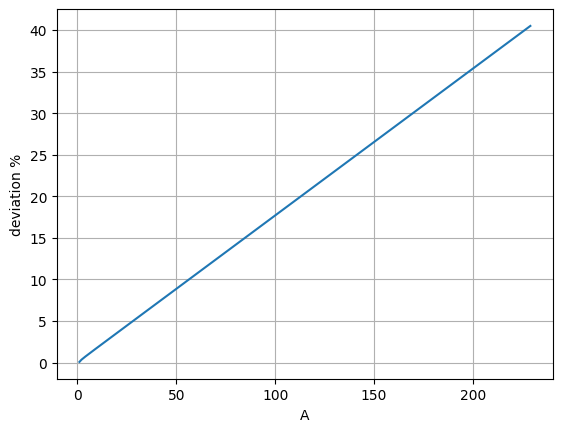

In [7]:
xs = np.arange(0, len(means), 1)
diff = [(i - l)/l*100 for i, l in zip(means, u_ls)]
plt.plot(As, diff)
plt.xlabel("")
plt.grid()
plt.ylabel("deviation %")
plt.xlabel("A")
plt.show()


Change this cell to your conclusion!

## Experiment 5: Neutron slowing down in elastic scattering

Let's slow down a neutron! From the previous exercises we could conclude that in our "billiard ball" scattering the energy and the angle is in a direct relationship. Therefore, we can sample one and figure out the other. But for the moment let's just neglect the angle completely and care only about the energy loss (for which the distribution we have played with in Experiment 3). We will try to figure out how many scattering events it takes to slow down a neutron from 2 MeV to 1eV (we consider that there are no temperature effects). 

Investigate some target nuclide. Which nuclides are effective in slowing neutrons? Note down some values. 

In [16]:
def neutronLetargizer(Ei,Ef,A):
    """Function calculate how many scattering events are needed to slow a neutron
    from an initial energy (Ei) to a final energy (Ef)
    Parameters
    ----------
    Ei : float
        Initial energy of the neutron
    Ef : float
        Final energy to be reached
    A : float
        Mass number of the scatterer
    
    Returns
    -------
    N : int
        Number of scattering events
    """
    a=((A-1)/(A+1))**2
    N=0
    mu = np.random.uniform(-np.pi, np.pi,N)
    E=Ei
    while E>=Ef:
        theta = np.random.uniform(-np.pi, np.pi,1)
        E = ((1+a) +(1-a)*np.cos(theta))*E/2
        #sample a random outgoing energy based on alpha and E.
        N=N+1
    return N    

Let's run this function for various nuclides, both light and heavy!

In [20]:
A=1
Ei=2.0 #MeV
Ef=1e-6 #MeV
print(neutronLetargizer(Ei,Ef,A))

14


That's a pretty cool function we have now. We can use it to look at the statistics of the number of scattering needed! Let's run this function for 10k neutrons and calculate the mean and visualize the distribution of the number of scattering events needed. (Notice that running this many neutrons for heavy nuclide might take some time)

In [43]:
A=1
E0=2.0 #MeV
Ef=1e-6 #MeV

#######
Ns=[]

for _ in range(10000): # _ means here that we just don't care about the iteration index
    Ns.append(neutronLetargizer(E0,Ef,A))

print('Mean \t Standard deviation')
print()#complete the line by calculating the mean of the list of number of scattering events with np.mean and
       #the standard deviation with np.std

plt.figure()
# use plt.hist to investigate the distribution of the number of scattering events.
plt.show()

Mean 	 Standard deviation



<Figure size 640x480 with 0 Axes>

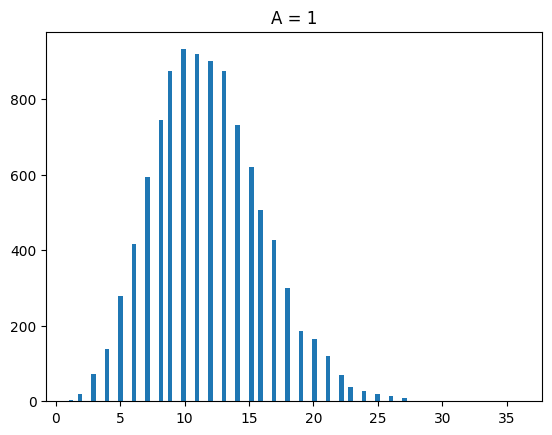

In [44]:
plt.title(f"A = {A}")
plt.hist(Ns, 100)
plt.show()

In [45]:
np.mean(Ns), np.std(Ns) # I just did this for all 3

(11.813, 4.213576983988782)

Change this cell to your conclusion! And fill out the table

|A  | $\bar N$ | std |
|---|----------|-----|
|1  |    11.813     |  4.213  |
|12 |    91.2837     |  7.00  |
|238|    1730.4753     |  29.8279  |

## Experiment 6: Sampling from distributions

In the video recording and in the Appendix of the lecture notes we have reviewed how to sample numbers from distributions, in the following we are going to implement these methods for neutron transport related tasks.

### Discrete distribution: which event happens?

The probability of reaction $i$ happening at energy $E$ is 

\begin{equation}
\frac{\Sigma_i(E)}{\Sigma_t(E)}
\end{equation}

Let us consider that in our material only two reactions might happen: scattering or capture, thus a simple condition can be used to decide which happens.

Complete the `reactionType` function to return a random event type. Assume that at the energy the neutron is travelling with $\Sigma_s=0.64 \: \text{cm}^{-1}$ and $\Sigma_c=0.39 \: \text{cm}^{-1}$. Call the function with these values.

In [75]:
def reactionType(SigS,SigC):
    """Function to sample a random event type
    
    Parameters
    ----------
    SigS : float
        Macroscopic scattering cross section
    SigC : float
        Macroscopic capture cross section
    """
    SigT= SigS + SigC
    #complete the line
    x= np.random.uniform(0, 1,1)
    #sample random number between 0 and 1
    if x < SigS/SigT:
        return 'scatter'
    else: 
        return 'capture'
    

ss=0.64
sc=0.39
print(reactionType(ss, sc)) #complete the line with the function call

capture


Numpy actually has a built in function `np.random.choice()`, which does the same for us. As an input it takes a list of choices to sample from, and optionally one can also pass a list of probabilities.

In [99]:
np.random.choice(['scatter','capture'],p=[ss/(ss+sc),sc/(ss+sc)])

'scatter'

### Continous distribution I: path to next collision

Let's consider that we have some probability density function $p(x)$, and the related cumulative distribution function is $F(x)=\int_{-\infty}^xp(t)dt$. This function is going to take values between 0 and 1. So if we can sample random numbers uniformly between 0 and 1, we could just convert them by evaluating the inverse of the cumulative distribution function to obtain a random value $x$ sampled from the distribution:

$x=F^{-1}(r)$

This of course is only useful, when it is possible to easily integrate the probability density function.  

Let's see how we can use this to sample random distances travelled by a neutron between collision events. We learnt that 

$\exp(-\Sigma_t x)$ is the probability that a neutron moves a distance dx without any interaction.

and 

$\Sigma_t \exp(-\Sigma_t x)dx$ is the probability that the neutron has its interaction at dx.

So

$p(x)=\Sigma_t \exp(-\Sigma_t x)$

Thus

$F(x)=1-\exp(\Sigma_tx)$

If we take the inverse, to sample a random path

$x=-\frac{\ln(1-r)}{\Sigma_t}$

but if r is uniform over $[0,1]$, than $1-r$ is also uniform over $[0,1]$, so this simplifies to

$x=-\frac{\ln r}{\Sigma_t}$

Complete the `distanceToCollision` function below.

**Note #1** computational speed is everything in MC calculations. Although in this course we don't try to avoid every unnecessary operation, this example is just to highlight that sometimes operations can be avoided with some reasoning.

**Note #2** the natural logarithm can be computed with `np.log`.

**Note #3** `numpy.random` has a built-in function to sample the exponential distribution, nevertheless here we will convert the uniformly distributed random numbers between $[0,1]$ to exponentially distributed random numbers.

In [ ]:
def distanceToCollision(SigT,N=1):
    """Function to sample the distance between collisions
    
    Parameters
    ----------
    SigT : float
        Total Macroscopic cross section in 1/cm
    N : int
        Number of events to be sampled (default=1)
    
    Returns
    -------
    x : float or array-like
        Random distance between collisions
    """
    r = np.random.uniform(0,1,N)
    x = # Complete the line
    return x

We can now try this function. Let's consider that 1 MeV neutrons enter a material which has a total cross section of $\Sigma_t=0.18 \: \text{cm}^{-1}$ at this energy. Or well, let's consider that 10k neutrons enter the material, and let's see how the distribution of the random distances looks like, and what is the mean.

In [ ]:
SigT=0.18
N=10000
ds=#call distanceToCollision() here

plt.figure()
plt.hist(ds,100)
plt.show()

print('Empirical Mean (cm) \t Theoretical mean (cm)')
print() #print the empirical mean free path. and the mean free path expected from theory

### Continous distribution II: Watt distribution


When the probability density function is less well behaving, and we cannot obtain the cumulative distribution function easily, we can use for example the rejection method. In this case, we draw a random number (r1), convert it to be between $a$ and $b$ (the bounds of the random value), then we draw an other random number (r2) to create a $y$ value based on the maximum of the probaility density function (M). If the $(x,y)$ pair is under the curve (ie. $y<p(x)$) we accept the value. 

<img src="rejection.png" width="200"/>

**Note** This might be very inefficient if the probability density function is peaked. There are several other methods to more efficient sampling.

Let's try to use this method for sampling the Watt-spectrum which is the probability density function of the energy of neutrons emerging from fission.

$$\chi (E)=C_1\cdot \exp(-\frac{E}{C_2})\cdot \sinh(\sqrt{C_3\cdot E})$$

For now, we will just visualize how the function works (later in a Home Assignment you will extend this method to generate random numbers sampled from this distribution)

Draw 100 numbers $x$ between 0-10 MeV and draw 100 numbers $y$ between 0 and the maximum of $\chi(E)$. If the sampled energy is accepted, plot the $(x,y)$ coordinate with green, else with red.

Does this method seem to be efficient to sample the Watt-spectrum? Count the number of accepted random samples to estimate the efficiency!

In [ ]:
def watt(x): 
    C1 = 0.453
    C2 = 0.965
    C3 = 2.29
    return #complete the line
                                
E=np.linspace(0,10,10000)
plt.figure()
plt.plot(E,watt(E))
maxW=np.max(watt(E))

for _ in range(100):
    xi=np.random.uniform(0,10)
    yi=#complete the line
    if yi<watt(xi):
        plt.plot(xi,yi,'gx')
    #complete the if/else statements
    #count how often a number is accepted!
    
plt.xlabel('Energy (MeV)')
plt.ylabel(r'$\chi (MeV^{-1})$')
plt.show()

print()#print the estimated efficiency 

Change this cell to your conclusion!

# Experiment 7: scattering of thermal neutrons (optional)

Do you feel brave enough to look at the scattering kernel for thermal neutrons? If yes, you are at the right place.

Implement the following scattering kernel, then read and run the code block below for plotting the kernel. We are going to plot $\sigma_s(E'\rightarrow E)E'(1-\alpha)$

\begin{equation}
\begin{aligned}
\sigma_s(E'\rightarrow E)=\frac{\sigma_s}{2E'}\eta^2\Bigg[\text{erf}\Bigg(\eta\sqrt{\frac{E}{kT}}-\rho\sqrt{\frac{E'}{kT}}\Bigg)\pm \text{erf}\Bigg(\eta\sqrt{\frac{E}{kT}}+\rho\sqrt{\frac{E'}{kT}}\Bigg)\Bigg]+ \\ \frac{\sigma_s}{2E'}\eta^2\exp\Bigg(-\frac{E-E'}{kT}\Bigg)\Bigg[\text{erf}\Bigg(\eta\sqrt{\frac{E'}{kT}}-\rho\sqrt{\frac{E}{kT}}\Bigg)\mp \text{erf}\Bigg(\eta\sqrt{\frac{E'}{kT}}+\rho\sqrt{\frac{E}{kT}}\Bigg)\Bigg]
\end{aligned}
\end{equation}

where


$$\eta=\frac{A+1}{2\sqrt{A}} \quad \text{and} \quad \rho=\frac{A-1}{2\sqrt{A}}$$

and the upper sign is for $E\leq E'$, and the lower sign is for $E\geq E'$.

If you are unsure about $kT$ units, convert the values to eV. What is your conclusion for scattering at thermal energies? How do heavy and light nuclides act differently as scatterers? Where does the kernel converge with increasing incoming neutron energy (at $100 kT$)?

**Note #1**: you can use the `scipy.special.erf` function.

**Note #2**: The function will probably break if you use too high ingoing neutron energies.

In [ ]:
from scipy.special import erf
def scatteringKernel(Ep,Es,A=1,T=300):
    """Function to calculate the scattering probability for thermal neutrons
    
    Parameters
    ----------
    Ep : float
        In-going neutron energy
    Es : array-like
        Out-going neutron energies
    A : int
        mass number (default=1)
    T : float
        temperature (default=300)
        
    """
    k=8.617333262145E-5 #Boltzmann constant eV/K
    eta=(A+1)/(2*np.sqrt(A))
    rho=(A-1)/(2*np.sqrt(A))
    alpha=((A-1)/(A+1))**2
    ps=[]
    for E in Es:
        if E<=Ep:
            p=#complete the line
            ps.append(p)
        else:        
            p=#complete the line
            ps.append(p)
    return np.array(ps)*Ep*(1-alpha)

In [ ]:
%matplotlib inline
k=8.617333262145E-5 #eV/K
T=1200 #K

for Ai in [1,2,12]:
    plt.figure()
    for i in [1,4,10,25]:
        Ef=np.linspace(0,3*i*k*T,1000)
        Ei=i*k*T
        plt.plot(Ef/Ei,scatteringKernel(Ei,Ef,A=Ai,T=T),label='{}kT'.format(i))
    plt.title('A = '+str(Ai))
    plt.legend()
    plt.xlabel(r'$E_{final}/E_{initial}$')
    plt.ylabel(r'$\sigma(E_{final}\rightarrow E_{initial})E_{initial}(1-\alpha)/\sigma_s$')
    plt.show()